## Data-cleaning and EDA for Guided Capstone 2--Tom Keating

## 1. Loading data and importing modules

In [8]:
#I like this Markdown mode feature! Didn't know that trick until now.

#importing modules--may add to this later
import pandas as pd
import matplotlib.pyplot as plt
#getting error and need to install 1.3.6 grrr, ok, many cups of coffee later...

In [9]:
#df=pd.read_csv('//Users/Owner/OneDrive/Downloads/manufacturing_defect_dataset.csv')

In [10]:
#--that didn't work, nor did what I typed below:

In [11]:
import os                  #many workarounds later...
current_path = os.getcwd()

In [12]:
print(current_path)   #unless I put the file there, nothing I do
#is able to FORCE Jupyter to go looking in the directory where the file actually is

C:\Users\Owner


In [13]:
df=pd.read_csv('manufacturing_defect_dataset.csv')  #and now it works

In [14]:
df. head()  #well...here we go:  

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


## 2. Inspecting the dataset

In [15]:
df.shape  #ok, that's in line with what Kaggle said

(3240, 17)

In [16]:
df.info()  #amazingly, the data has no NaNs or other missing data, and does not have any unexpected data types
#Kaggle did rate this dataset as a '10' for useability, perhaps that's why

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ProductionVolume      3240 non-null   int64  
 1   ProductionCost        3240 non-null   float64
 2   SupplierQuality       3240 non-null   float64
 3   DeliveryDelay         3240 non-null   int64  
 4   DefectRate            3240 non-null   float64
 5   QualityScore          3240 non-null   float64
 6   MaintenanceHours      3240 non-null   int64  
 7   DowntimePercentage    3240 non-null   float64
 8   InventoryTurnover     3240 non-null   float64
 9   StockoutRate          3240 non-null   float64
 10  WorkerProductivity    3240 non-null   float64
 11  SafetyIncidents       3240 non-null   int64  
 12  EnergyConsumption     3240 non-null   float64
 13  EnergyEfficiency      3240 non-null   float64
 14  AdditiveProcessTime   3240 non-null   float64
 15  AdditiveMaterialCost 

In [17]:
#A few comments after looking this over more carefully.  'Additive mfg' refers to 3D printing,
#so all of these parts have 3D printing going on to some extent (no zero values)
#'Defect status' is a prediction from the authors (not a measured quantity). 
#let's see what they found
a=df['DefectStatus'].sum()
print(a)

2723


In [18]:
#very surprising.  Defects are supposed to be 'rare' but are 2722/3240=84% predicted in this dataset...
#seems odd.  More digging required!
#in the meantime, I have set up the GitHub for this project and loaded the dataset and .ipynb file

## 3.Data Definitions and checking for clean data: unique values, outliers, etc

In [19]:
#  Want to dig in and understand all these columns. let's try this:
df.describe()  #this is helpful.  Want to check the integer-valued columns first; the summary stats are good for the floats

,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
count,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000,3240.000000
mean,548.523148,12423.018476,89.833290,2.558951,2.749116,80.134272,11.476543,2.501373,6.019662,0.050878,90.040115,4.591667,2988.494453,0.299776,5.472098,299.515479,0.840432
std,262.402073,4308.051904,5.759143,1.705804,1.310154,11.611750,6.872684,1.443684,2.329791,0.028797,5.723600,2.896313,1153.420820,0.116400,2.598212,116.379905,0.366261
min,100.000000,5000.174521,80.004820,0.000000,0.500710,60.010098,0.000000,0.001665,2.001611,0.000002,80.004960,0.000000,1000.720156,0.100238,1.000151,100.211137,0.000000
25%,322.000000,8728.829280,84.869219,1.000000,1.598033,70.103420,5.750000,1.264597,3.983249,0.026200,85.180203,2.000000,1988.140273,0.200502,3.228507,194.922058,1.000000
50%,549.000000,12405.204656,89.704861,3.000000,2.708775,80.265312,12.000000,2.465151,6.022389,0.051837,90.125743,5.000000,2996.822301,0.297470,5.437134,299.728918,1.000000
75%,775.250000,16124.462428,94.789936,4.000000,3.904533,90.353822,17.000000,3.774861,8.050222,0.075473,95.050838,7.000000,3984.788299,0.402659,7.741006,403.178283,1.000000
max,999.000000,19993.365549,99.989214,5.000000,4.998529,99.996993,23.000000,4.997591,9.998577,0.099997,99.996786,9.000000,4997.074741,0.499500,9.999749,499.982782,1.000000


In [20]:
#curious about unique values for some of the integer columns.
arr1 = df['SafetyIncidents'].unique()
arr2 = df['DeliveryDelay'].unique()  
# printing arrays
print('Safety: ',arr1, 'Delays: ',arr2) 

 #ok, so all int values between min and max are present here.  MaintenanceHours might later be lumped into low, med, high;

Safety:  [0 7 2 8 3 4 6 1 5 9] Delays:  [1 4 0 5 3 2]


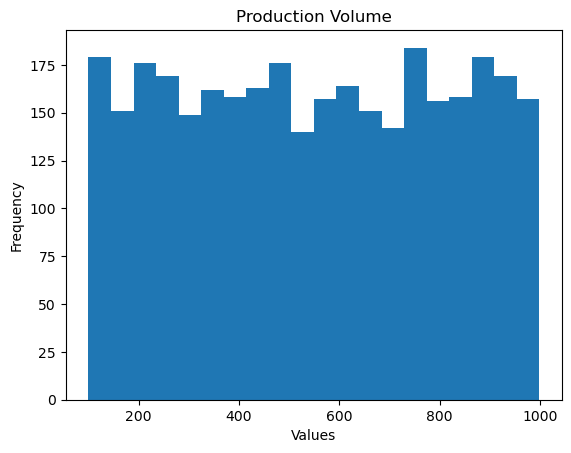

In [21]:
#needless to say, later on some columns may need normalizing, while some of the integer ones might be categories
#let's make separate lists of variables by type, might be handy later:
float_list = ['ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore', 'DowntimePercentage', 'InventoryTurnover', 'StockoutRate', 'WorkerProductivity', 'SafetyIncidents','EnergyConsumption', 'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']
int_list = ['ProductionVolume', 'DeliveryDelay', 'MaintenanceHours', 'SafetyIncidents'] #not including defectstatus--maybe rename this
#note: production volume is integer-valued but could be converted to float or binned to make categories (e.g., 'large', 'medium', 'small'.
#let's look at a histogram or two
plt.hist(df['ProductionVolume'], bins=20)
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Production Volume')
plt.show()   #well, so this doesn't show much of a pattern...

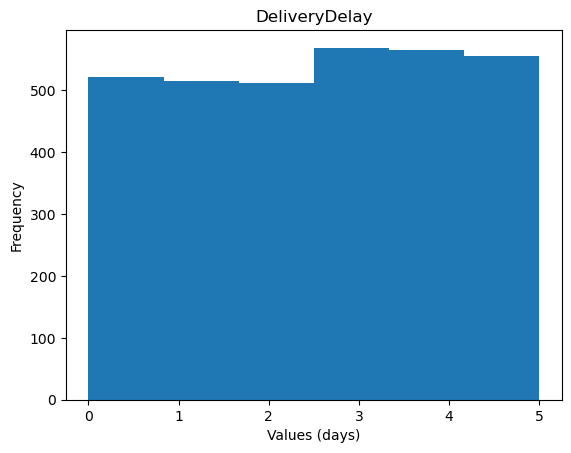

In [22]:
#Let's take a look at the other integer-valued columns.
plt.hist(df['DeliveryDelay'], bins=6)
plt.xlabel('Values (days)')
plt.ylabel('Frequency')
plt.title('DeliveryDelay')
plt.show()   #So:  delays are a big deal! I'm surprised the plot is so flat...

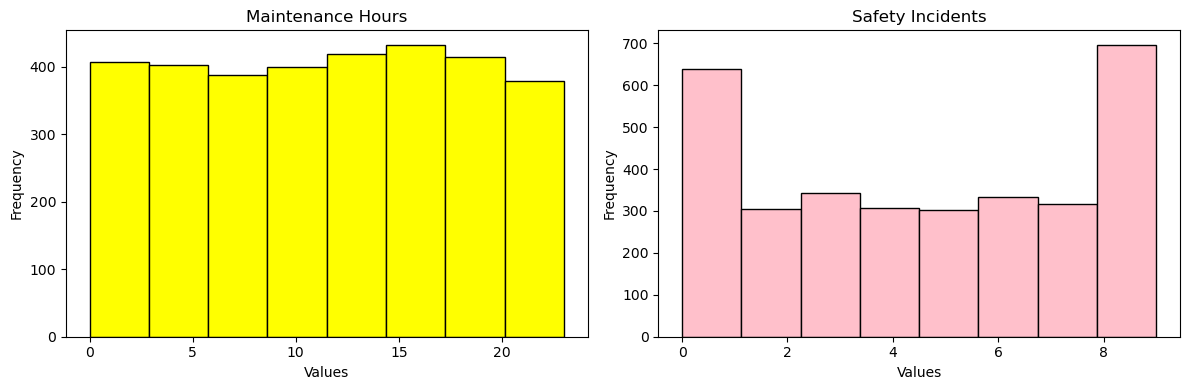

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
 
axes[0].hist(df['MaintenanceHours'], bins=8, color='Yellow', edgecolor='black')
axes[0].set_title('Maintenance Hours')
 
axes[1].hist(df['SafetyIncidents'], bins=8, color='Pink', edgecolor='black')
axes[1].set_title('Safety Incidents')
 
# Adding labels and title
for ax in axes:
    ax.set_xlabel('Values')
    ax.set_ylabel('Frequency')
 
# Adjusting layout for better spacing
plt.tight_layout()
 
# Display the figures
plt.show()

In [24]:
#well, so there's a lot of low and high maintenance, less in-between; roughly the same trend for safety incidents.

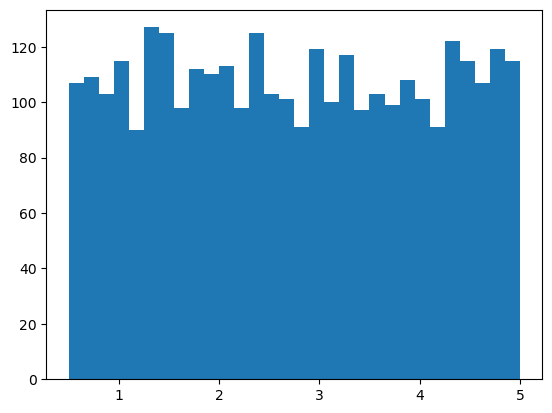

In [25]:
#Very interested in 'Defect Rate'; actual rate per thousand--I am getting the feeling there's not a lot of signal
#but lots of noise...
plt.hist(df['DefectRate'], bins=30)
plt.show()

In [26]:
#let's take a look at the boxplots for float variables and see if we have outliers.
import seaborn as sns


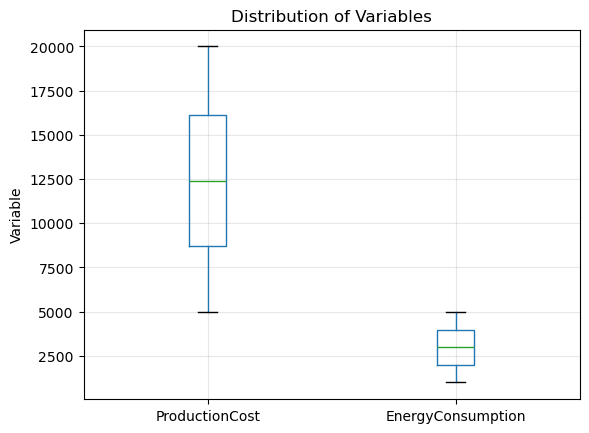

In [27]:
data_to_plot = df[['ProductionCost','EnergyConsumption']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #made the list of float variable columns above

#ok, so there aren't any really big outliers with these, but the numerical range is big.  

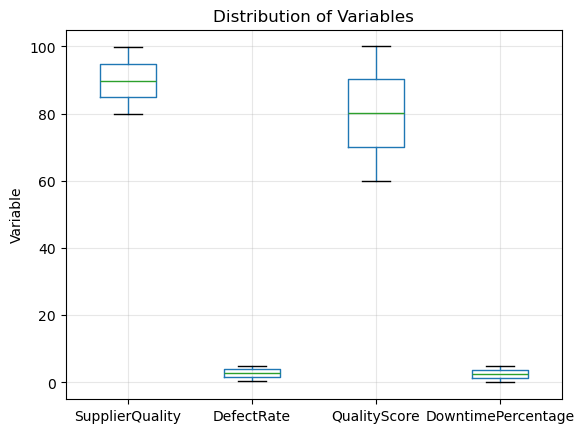

In [28]:
data_to_plot = df[['SupplierQuality', 'DefectRate', 'QualityScore', 'DowntimePercentage']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #I am doing these a few at a time for comparison's sake

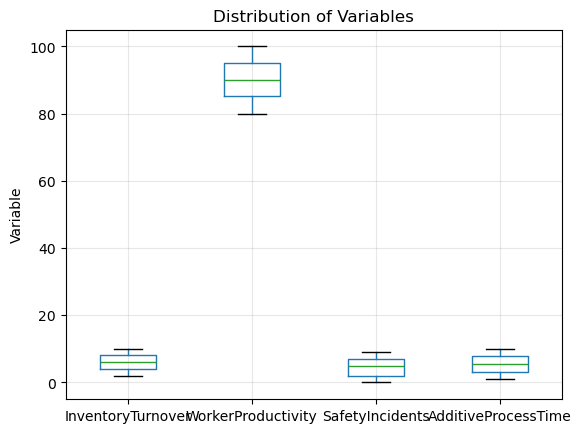

In [29]:
data_to_plot = df[['InventoryTurnover', 'WorkerProductivity', 'SafetyIncidents','AdditiveProcessTime']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #I am doing these a few at a time for comparison's sake

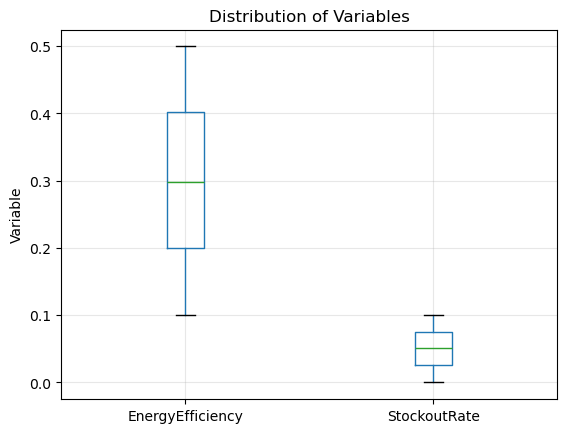

In [30]:
data_to_plot = df[['EnergyEfficiency', 'StockoutRate']]
data_to_plot.boxplot()
plt.ylabel('Variable')
plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()  #Energy Efficiency seems mostly low, huh.  Stockout rates are low, too.

## 4. Wrap-up and conclusions

In [31]:
#I don't see any other data cleaning issues at this point; I may decide later not to use
#the 'defect status' column at all (no idea how they derived it) and instead investigate predicting defect
#rates above some threshold.  Next for EDA and beyond, may want to bin some data/create dummies and
#dig into what column features tell us about defect rates.


# EDA--Guided Capstone 2_TLK

## 1. Heat maps and correlations

In [32]:
#So I've taken a look at the variables but now want to see if there are relationships or patterns
#between them.  I'd like to start by looking at just the float variables; recall I have 'float_list' 
#for the column header names, but without production volume, which I will bin later.
  
print(df[float_list].corr()) 


                      ProductionCost  SupplierQuality  DefectRate  \
ProductionCost              1.000000        -0.024103    0.014428   
SupplierQuality            -0.024103         1.000000    0.012157   
DefectRate                  0.014428         0.012157    1.000000   
QualityScore               -0.001603        -0.029330   -0.036350   
DowntimePercentage         -0.004078         0.006298   -0.011208   
InventoryTurnover           0.022749         0.018228   -0.014148   
StockoutRate                0.006006        -0.001393    0.007547   
WorkerProductivity          0.005030        -0.017389   -0.000388   
SafetyIncidents            -0.006958         0.004552    0.012196   
EnergyConsumption          -0.006728        -0.003582    0.005297   
EnergyEfficiency           -0.002778        -0.011614   -0.014168   
AdditiveProcessTime         0.011075        -0.012507   -0.028426   
AdditiveMaterialCost       -0.002114        -0.002430    0.011596   

                      QualityScor

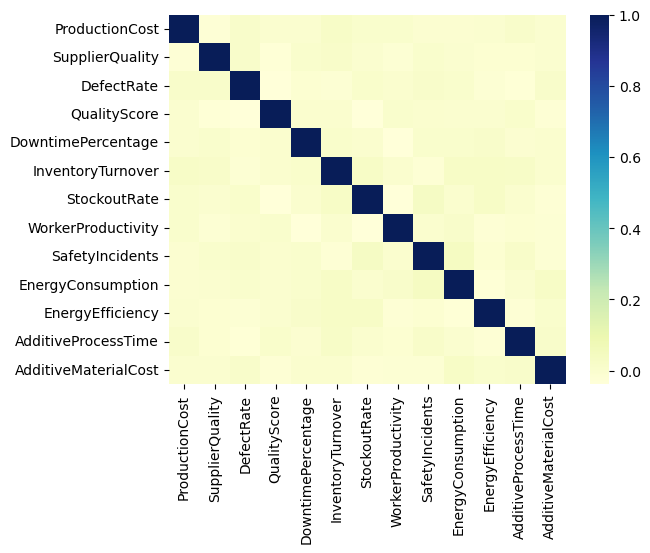

In [33]:
#hard to parst the above, so let's plot correlation heatmap 
#BUT at first glance they sure look weak--mostly 3 % or less!

dataplot = sns.heatmap(df[float_list].corr(), cmap="YlGnBu", annot=False) 
plt.show() 
#Note I tried with annot=True, hard to read values

In [34]:
#Ouch.  These variables aren't telling us much about the target.  I see some weak
#increase in color for ProductionCost and SupplierQuality versus DefectRate (what a surprise).
#let's see what the unbinned integer values are doing.
print(df[int_list].corr()) 

                  ProductionVolume  DeliveryDelay  MaintenanceHours  \
ProductionVolume          1.000000       0.016193         -0.004554   
DeliveryDelay             0.016193       1.000000          0.018144   
MaintenanceHours         -0.004554       0.018144          1.000000   
SafetyIncidents          -0.024195       0.006030          0.009174   

                  SafetyIncidents  
ProductionVolume        -0.024195  
DeliveryDelay            0.006030  
MaintenanceHours         0.009174  
SafetyIncidents          1.000000  


In [35]:
#well ok so they don't correlate much with each other; what about with DefectRate?
targ_int_list = []
int_list = ['ProductionVolume', 'DeliveryDelay', 'MaintenanceHours', 'SafetyIncidents']
targ_int_list=int_list.append('DefectRate')  #adding target column
print(int_list)   #HUH?  Why wasn't this working?
#this is rotten; I wanted the item added to the new list, not the old one, sigh.

['ProductionVolume', 'DeliveryDelay', 'MaintenanceHours', 'SafetyIncidents', 'DefectRate']


In [36]:
print(df[int_list].corr()) 

                  ProductionVolume  DeliveryDelay  MaintenanceHours  \
ProductionVolume          1.000000       0.016193         -0.004554   
DeliveryDelay             0.016193       1.000000          0.018144   
MaintenanceHours         -0.004554       0.018144          1.000000   
SafetyIncidents          -0.024195       0.006030          0.009174   
DefectRate               -0.019360      -0.023024         -0.008687   

                  SafetyIncidents  DefectRate  
ProductionVolume        -0.024195   -0.019360  
DeliveryDelay            0.006030   -0.023024  
MaintenanceHours         0.009174   -0.008687  
SafetyIncidents          1.000000    0.012196  
DefectRate               0.012196    1.000000  


In [37]:
#Here again, not much to go on.  At this stage I will try a couple things: 1) feature engineering (e.g., maybe look at 
#things normalized by prod vol or some other variable) and 2) go back to that 'predicted defect' column--what were they
#flagging anyway?

## 2.Another look at features

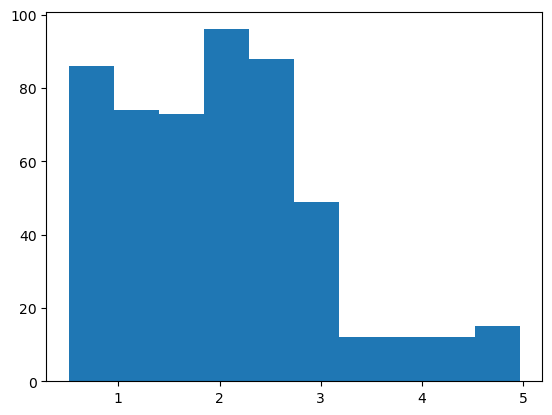

In [38]:
#Out of curiosity, how does defect rate relate to defect status--their prediction?
#let's look at low/no defect status
d = df.loc[df["DefectStatus"] == 0]
plt.hist(d['DefectRate'], bins=10)

plt.show()

In [39]:
#huh.  There appears to be a cutoff around 3 defects/thousand (zero means low defects)
#ok:  so for future reference, whatever they did, they managed to roughly partition
#the data into hi/low with that cutoff.  

## 2a. Features revisited--scatterplots

In [40]:
#let's consider columns again.  I will also print out some dataset info for background (below) with my comments
print(df.columns)

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality',
       'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost',
       'DefectStatus'],
      dtype='object')


About Dataset
Introduction
This dataset provides insights into factors influencing defect rates in a manufacturing environment. Each record represents various metrics crucial for predicting high or low defect occurrences in production processes.

Variables Description
Production Metrics
ProductionVolume: Number of units produced per day.
Data Type: Integer.
Range: 100 to 1000 units/day.

ProductionCost: Cost incurred for production per day.
Data Type: Float.
Range: $5000 to $20000.

Supply Chain and Logistics
SupplierQuality: Quality ratings of suppliers.
Data Type: Float (%).
Range: 80% to 100%.

DeliveryDelay: Average delay in delivery.
Data Type: Integer (days).
Range: 0 to 5 days.

Quality Control and Defect Rates
DefectRate: Defects per thousand units produced.
Data Type: Float.
Range: 0.5 to 5.0 defects.

QualityScore: Overall quality assessment.
Data Type: Float (%).
Range: 60% to 100%.

Maintenance and Downtime
MaintenanceHours: Hours spent on maintenance per week.
Data Type: Integer.
Range: 0 to 24 hours.

DowntimePercentage: Percentage of production downtime.
Data Type: Float (%).
Range: 0% to 5%.

Inventory Management
InventoryTurnover: Ratio of inventory turnover.
Data Type: Float.
Range: 2 to 10.

StockoutRate: Rate of inventory stockouts.
Data Type: Float (%).
Range: 0% to 10%.

Workforce Productivity and Safety
WorkerProductivity: Productivity level of the workforce.
Data Type: Float (%).
Range: 80% to 100%.

SafetyIncidents: Number of safety incidents per month.
Data Type: Integer.
Range: 0 to 10 incidents.

Energy Consumption and Efficiency
EnergyConsumption: Energy consumed in kWh.
Data Type: Float.
Range: 1000 to 5000 kWh.

EnergyEfficiency: Efficiency factor of energy usage.
Data Type: Float.
Range: 0.1 to 0.5.

Additive Manufacturing
AdditiveProcessTime: Time taken for additive manufacturing.
Data Type: Float (hours).
Range: 1 to 10 hours.

AdditiveMaterialCost: Cost of additive materials per unit.
Data Type: Float ($).
Range: $100 to $500.

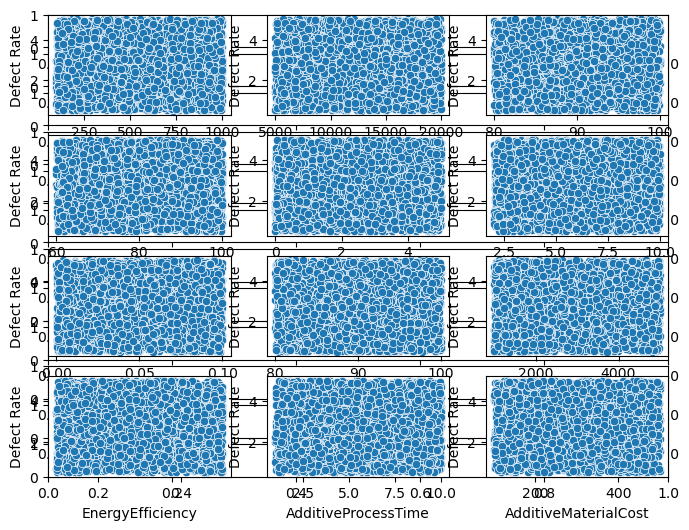

In [41]:
#It's not obvious which of these would scale with, say, production volume other than cost and energy consumption; but that can be saved for
#later when it's time for feature engineering.
#let's look at the scatterplots; maybe we have some nonlinear relationships here.

df_float = df[float_list]
#I'll consider the floating variable columns first--recall DefectRate is the target.  I decided to throw ProductionVolume in.

cols_to_plot = ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'QualityScore',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']   #we'll want Defect Rate only for the y (dependent/target) variable
fig, ax = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(8,6))
for i, col in enumerate(cols_to_plot):
    plt.subplot(4,3,(i+1))
    sns.scatterplot(x=df[col], y=df_float['DefectRate'])
    plt.ylabel("Defect Rate")

Text(0, 0.5, 'Defect Rate')

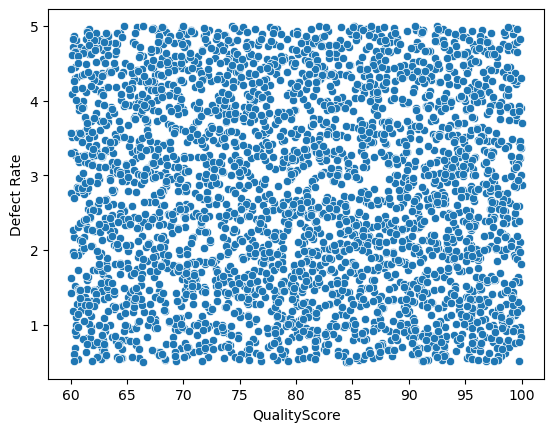

In [42]:
#ouch.  Let's try something different.
sns.scatterplot(x=df['QualityScore'], y=df_float['DefectRate'])
plt.ylabel('Defect Rate')

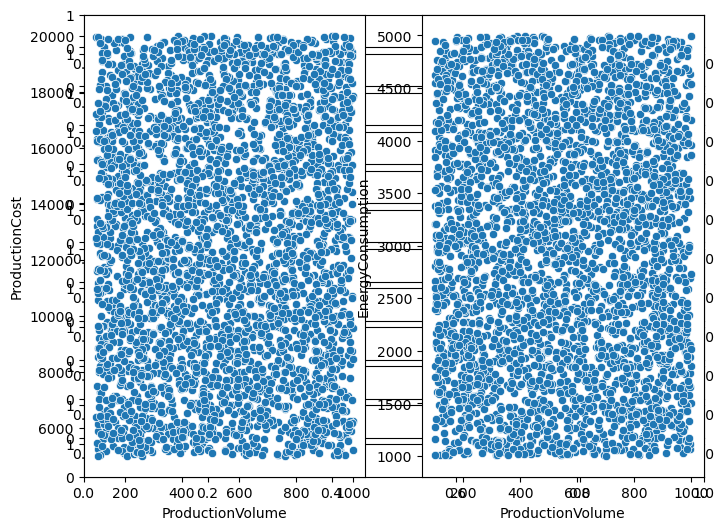

In [43]:
#gnarly.  Going back to an earlier idea, maybe energy consumption and production cost scale with production volume?
cols_to_plot2 = ['ProductionCost', 'EnergyConsumption']   #we'll want Defect Rate only for the y (dependent/target) variable
fig, ax = plt.subplots(nrows=len(cols_to_plot), ncols=1, figsize=(8,6))
for i, col in enumerate(cols_to_plot2):
    plt.subplot(1,2,(i+1))
    sns.scatterplot(x=df['ProductionVolume'], y=df_float[col])

## 2b. Plotting with int/categorical values

In [44]:
#well, I am taken aback at thes results above.  I will now revisit the categorical (integer) variables, where I thought I saw some structure
#in earlier parts of the analysis.  These include production ProductionVolume (binned), DeliveryDelay, MaintenanceHours, and SafetyIncidents.

#I'm going to add a column that labels defect rate 1 or 0 with 1 meaning =>3 defects/thousand as we saw earlier, 0 meaning less than.
#Mean defect rate is 2.75 in this dataset, so 3 ss not a bad breakpoint--seems reasonable
df=df.rename(columns={"Bin": "DefectLabel"})  #added a blank int column for bins earlier, fixing it now
print(df.columns)

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality',
       'DeliveryDelay', 'DefectRate', 'QualityScore', 'MaintenanceHours',
       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
       'WorkerProductivity', 'SafetyIncidents', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost',
       'DefectStatus'],
      dtype='object')


In [45]:
import numpy as np
df['DefectLabel'] = np.where(df['DefectRate'] >3, 1,0)  #seems to work
#Now I'm going to split up the df based on this flag.
mask = df['DefectLabel'] == 1
df_hi = df[mask]   #High defect rate rows
df_low = df[~mask]  #Low defect rate rows

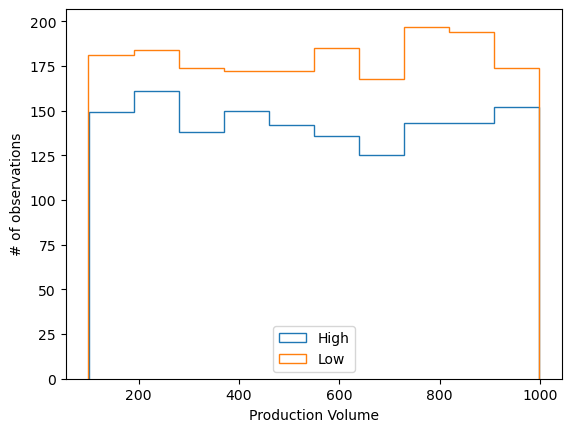

In [46]:
#now let's see if two histograms can be plotted in one, with colors to indicate high or low
fig, ax = plt.subplots()

# Plot a histogram of "ProductionVolume" for high defects
ax.hist(df_hi['ProductionVolume'], label=('High'), histtype='step', bins=10)
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(df_low['ProductionVolume'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel("Production Volume")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()
#ah, now I can see some differences emerge.  Is there some non-linearity in the high defect rate vs volume? Seems to dip, but low is flatter?

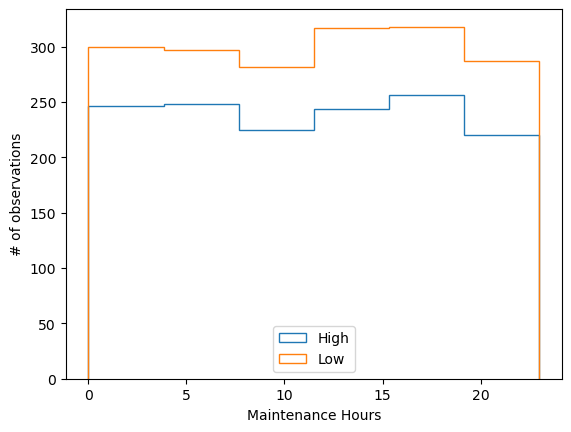

In [47]:
#let's try this with some other categories.
fig, ax = plt.subplots()

# Plot a histogram of "ProductionVolume" for high defects
ax.hist(df_hi['MaintenanceHours'], label=('High'), histtype='step', bins=6)
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(df_low['MaintenanceHours'], label=('Low'), histtype='step', bins=6)
ax.set_xlabel("Maintenance Hours")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()        #Here I see (perhaps?) a slight drop-off in defects with more maintenance hours, sensible...most pronounced at the high end

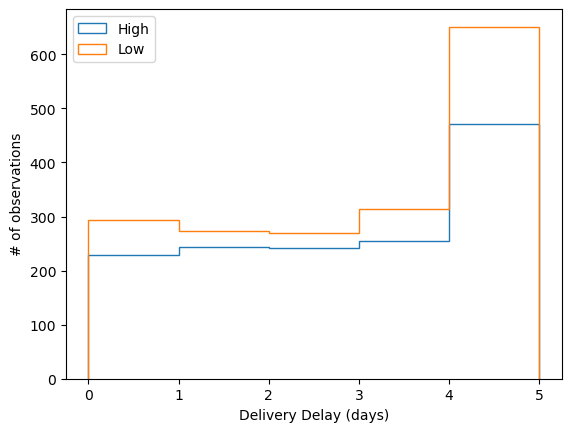

In [48]:
#How about DeliveryDelay
fig, ax = plt.subplots()

# Plot a histogram of "ProductionVolume" for high defects
ax.hist(df_hi['DeliveryDelay'], label=('High'), histtype='step', bins=5)
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(df_low['DeliveryDelay'], label=('Low'), histtype='step', bins=5)
ax.set_xlabel("Delivery Delay (days)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()         #both low and high are rising as delays increase, esp at 4-5 days

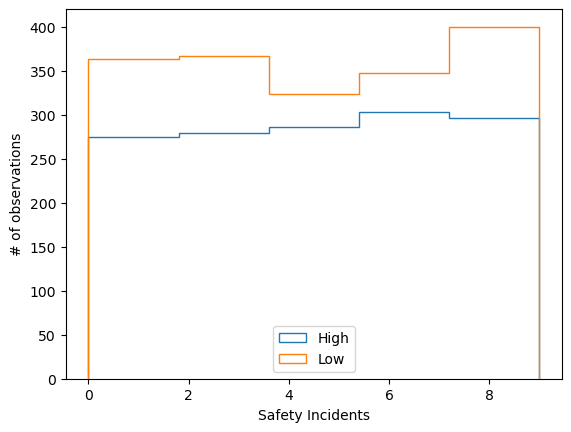

In [49]:
#Last but not least, safety incidents
fig, ax = plt.subplots()

# Plot a histogram of "ProductionVolume" for high defects
ax.hist(df_hi['SafetyIncidents'], label=('High'), histtype='step', bins=5)
# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(df_low['SafetyIncidents'], label=('Low'), histtype='step', bins=5)
ax.set_xlabel("Safety Incidents")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()      #Both are showing a slight increase in defects with safety incidents

## 2c. Revisiting the floats and the target--this time based on label (high/low defects)

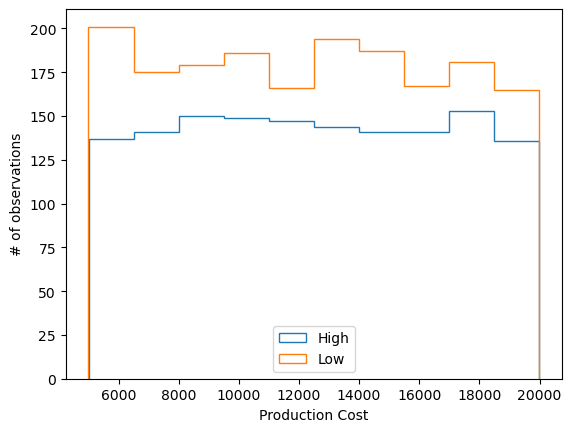

In [50]:
#I want to see the float variables again, but this time using histograms as above
#would love to automate this like above and plot a bunch of little ones all at once but it's taking forever
#cols_to_plot = ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'QualityScore',
#       'DowntimePercentage', 'InventoryTurnover', 'StockoutRate',
#       'WorkerProductivity', 'EnergyConsumption',
#       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost']   #we'll want Defect Rate only for the y (dependent/target) variable
#fig, ax = plt.subplots(nrows=len(cols_to_plot), ncols=4, figsize=(8,6))   nevermind
fig, ax = plt.subplots()
ax.hist(df_hi['ProductionCost'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['ProductionCost'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Production Cost')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()  #ok, so  (low) Defects are dropping slightly as production costs rise; strange, but maybe useful.

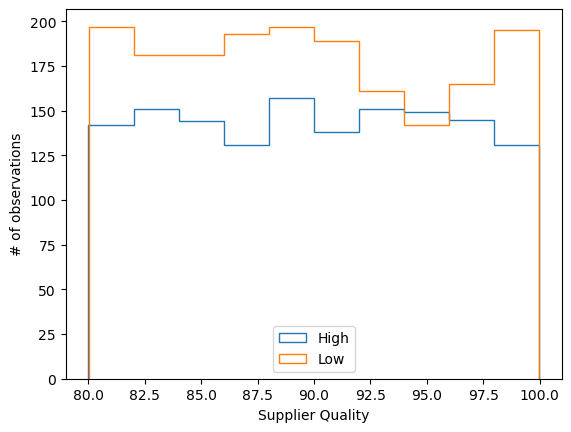

In [51]:
#continuing with supplier quality
fig, ax = plt.subplots()
ax.hist(df_hi['SupplierQuality'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['SupplierQuality'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Supplier Quality')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()   #strange to see the dip for low defects; this looks mostly noisy

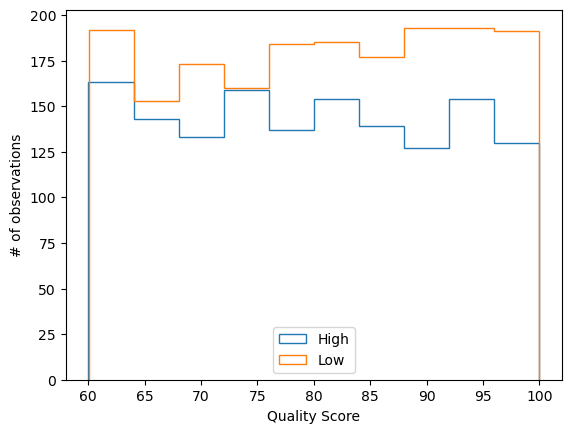

In [52]:
#and 'quality score'
fig, ax = plt.subplots()
ax.hist(df_hi['QualityScore'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['QualityScore'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Quality Score')
ax.set_ylabel("# of observations")
ax.legend()
plt.show() #I am not sure if this is an entirely objective measure, but number of high defects definitely drop as score goes up
#I would say this could be useful for the model--a 'keeper', unlike the supplier quality

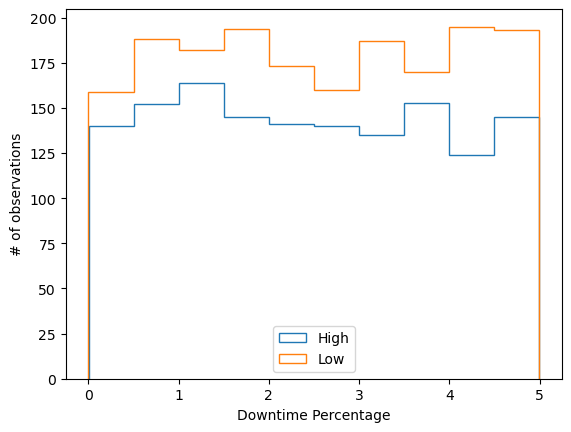

In [53]:
fig, ax = plt.subplots()
ax.hist(df_hi['DowntimePercentage'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['DowntimePercentage'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Downtime Percentage')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()  #ok; the trends look to oppose each other here:  more downtime means more low defects, fewer high defects. Reality check: passed.

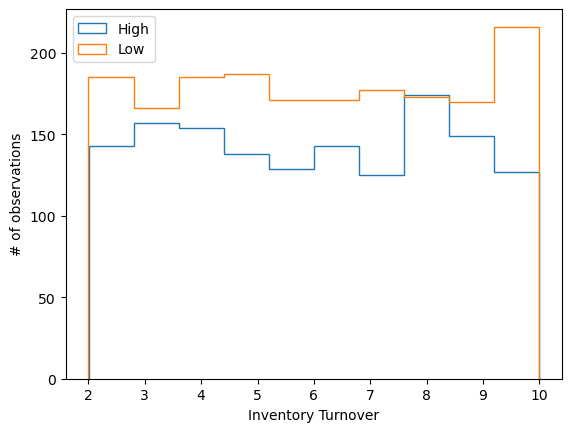

In [54]:
fig, ax = plt.subplots()
ax.hist(df_hi['InventoryTurnover'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['InventoryTurnover'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Inventory Turnover')
ax.set_ylabel("# of observations")
ax.legend()
plt.show() #I'm really not sure why higher inventory turnover would mean fewer defects--the trend is murky

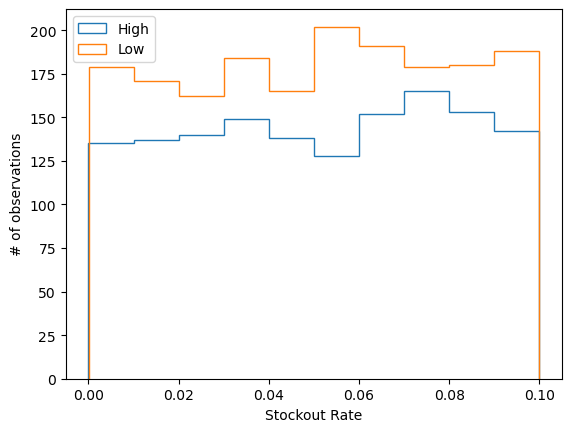

In [55]:
fig, ax = plt.subplots()
ax.hist(df_hi['StockoutRate'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['StockoutRate'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Stockout Rate')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()  #So, more stockouts---inc in higher defects?  Looks that way.  Perhaps more stockouts means--hurry up and produce which translates to errors

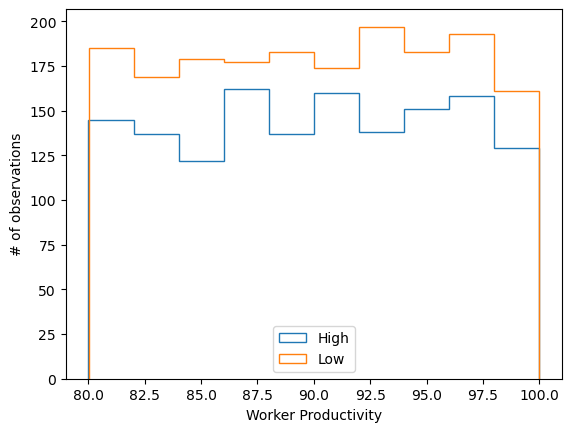

In [56]:
fig, ax = plt.subplots()
ax.hist(df_hi['WorkerProductivity'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['WorkerProductivity'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Worker Productivity')
ax.set_ylabel("# of observations")
ax.legend()
plt.show() # this looks rather meaningless, though you might expect higher productivity means fewer defects.  Hmm.

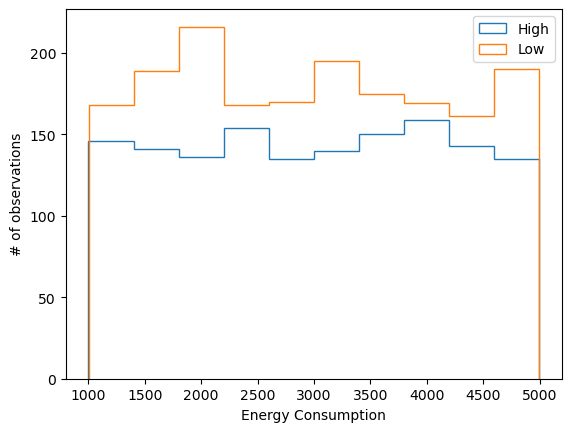

In [57]:
fig, ax = plt.subplots()
ax.hist(df_hi['EnergyConsumption'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['EnergyConsumption'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Energy Consumption')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()
#noisy.  Perhaps a slight downward trend for high-defect lots.

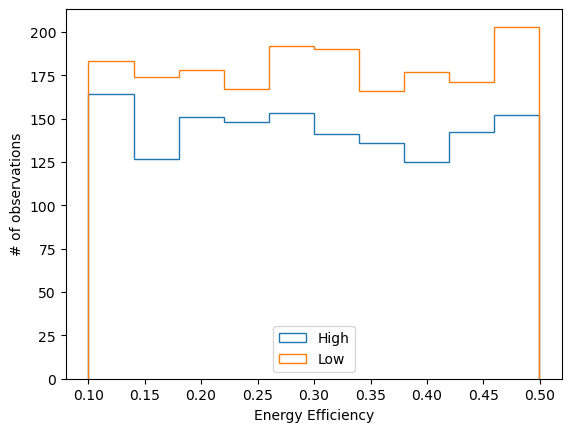

In [58]:
fig, ax = plt.subplots()
ax.hist(df_hi['EnergyEfficiency'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['EnergyEfficiency'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Energy Efficiency')
ax.set_ylabel("# of observations")
ax.legend()
plt.show() #again a little wierd, with a drop in high defects as energy efficiency increases, except toward the high end.

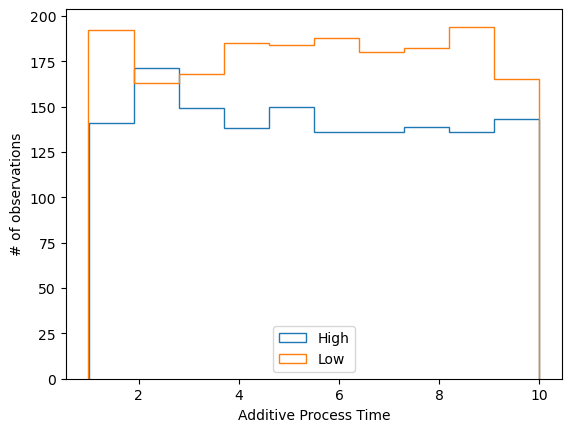

In [59]:
fig, ax = plt.subplots()
ax.hist(df_hi['AdditiveProcessTime'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['AdditiveProcessTime'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Additive Process Time')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()  #looks noisy; one would think additive process time is for correcting defects but no clear trend

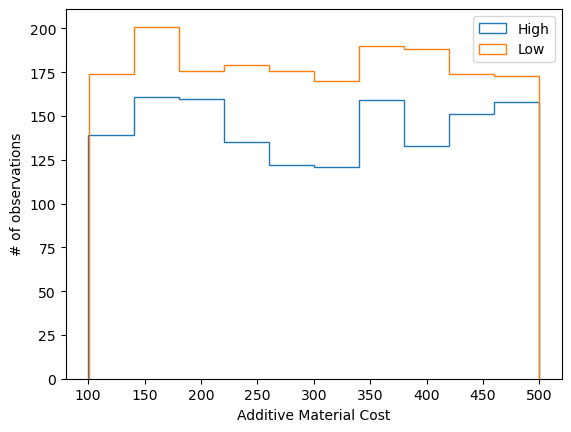

In [60]:
fig, ax = plt.subplots()
ax.hist(df_hi['AdditiveMaterialCost'], label=('High'), histtype='step', bins=10)
ax.hist(df_low['AdditiveMaterialCost'], label=('Low'), histtype='step', bins=10)
ax.set_xlabel('Additive Material Cost')
ax.set_ylabel("# of observations")
ax.legend()
plt.show()  #looks slightly bowed for high defects.  

# 3. Summary and conclusions:  EDA

In [61]:
#In the scatterplots and with (linear) correlations, there wasn't much of a signal in the float variables versus Defect Rate plotted as a 
#float itself; however, when Defect Rate is split into high/low using 3 parts/thousand (slightly above the mean), here and there some weak
#trends appear in the histograms. Feature scaling was checked versus, e.g., production volume vs price and energy consumption, but showed no
#clear pattern (just noise).

#In terms of feature selection, for now some columns will be set aside because they appear to be mostly noise, in particular:
# supplier quality, worker productivity, additive process time, and perhaps additive material cost.
#inventory turnover and energy consumption are borderline
#The others can be experimented on as they seem to show some discernable trends in the histograms above.

# 4. Preprocessing and Training Development

## 4a. Comments before proceeding--then creating dummies

In [62]:
# A recap on the approach for each variable.
#  Categorical values:
#  Production volume:  this variable runs from 100 to 1000, and will be binned into ten bins (100-200 etc) and then set as a categorical variable
#  For now, I am resisting the urge to just coarse-bin into hi, med and low for any of these including:
#  maintenance hours, delivery delays, and safety incidents, for which I will use raw integer values for categories

#  Subsequenty the float variables need to be scaled: Production cost, Quality score, downtime%, inventory turnover, stockout rate, additive material cost,
#  energy consumption, and energy efficiency.

#  Note that supplier quality, additive process time and worker productivity aren't being kept at this stage

In [63]:
#First things first: I want to create the bin labels for production volume.
#remember when I did 'describe' this column had min 100 and max 999
vbins = [99, 200, 300, 400, 500, 600, 700, 800, 900, np.inf]  #changed that last limit instead of 1000, didn't help
#OK: after lots of investigation that's why the first bin could not be set to 100 otherwise it gave NaNs in the binned column, arghgh.
# Also important to note:  I haven't split into hi/low as in the prior section, that I'll do later.

df["Prod_vol_bin"] = pd.cut(df["ProductionVolume"], bins=vbins, labels=False)   #this should create a column that shows the bin for a given volume
print(df.head(10))

   ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0               202    13175.403783        86.648534              1   
1               535    19770.046093        86.310664              4   
2               960    19060.820997        82.132472              0   
3               370     5647.606037        87.335966              5   
4               206     7472.222236        81.989893              3   
5               171     6975.931602        95.331919              1   
6               800    15889.698650        99.325486              3   
7               120    17266.779948        99.401489              4   
8               714     8202.670495        97.301422              5   
9               221    12587.790394        92.015843              2   

   DefectRate  QualityScore  MaintenanceHours  DowntimePercentage  \
0    3.121492     63.463494                 9            0.052343   
1    0.819531     83.697818                20            4.908328   
2    4.5145

In [64]:
#ok, that's fine now: we have prod_vol_bin, delivery delay, maintenance hours, and safety incidents (integers)
#which I want to create dummies for.  I"ll try to do this 'safely' by creating the dummy df separately then concat later
#per the guide:

#on a side note:  successful binning left actual integers in the prod_vol bin, not floats--warning flag to remember.
final_cats=['Prod_vol_bin', 'DeliveryDelay', 'MaintenanceHours', 'SafetyIncidents']  
dummy = pd.get_dummies(df, columns=final_cats, dtype=int)
dummy.head(10)  #well, after lots more messing around, now it looks ok:

,ProductionVolume,ProductionCost,SupplierQuality,DefectRate,QualityScore,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,EnergyConsumption,...,SafetyIncidents_0,SafetyIncidents_1,SafetyIncidents_2,SafetyIncidents_3,SafetyIncidents_4,SafetyIncidents_5,SafetyIncidents_6,SafetyIncidents_7,SafetyIncidents_8,SafetyIncidents_9
0,202,13175.403783,86.648534,3.121492,63.463494,0.052343,8.630515,0.081322,85.042379,2419.616785,...,1,0,0,0,0,0,0,0,0,0
1,535,19770.046093,86.310664,0.819531,83.697818,4.908328,9.296598,0.038486,99.657443,3915.566713,...,0,0,0,0,0,0,0,1,0,0
2,960,19060.820997,82.132472,4.514504,90.350550,2.464923,5.097486,0.002887,92.819264,3392.385362,...,0,0,1,0,0,0,0,0,0,0
3,370,5647.606037,87.335966,0.638524,67.628690,4.692476,3.577616,0.055331,96.887013,4652.400275,...,0,0,0,0,0,0,0,0,1,0
4,206,7472.222236,81.989893,3.867784,82.728334,2.746726,6.851709,0.068047,88.315554,1581.630332,...,0,0,0,0,0,0,0,1,0,0
5,171,6975.931602,95.331919,3.914574,92.568436,3.027324,7.930009,0.074069,87.079118,1238.994421,...,0,0,0,0,0,0,0,1,0,0
6,800,15889.698650,99.325486,4.789000,90.729911,3.559561,3.046889,0.040192,91.063158,3138.431150,...,0,0,0,0,0,0,0,0,1,0
7,120,17266.779948,99.401489,0.743605,92.119681,1.604879,8.380972,0.009702,88.705569,1004.108554,...,0,0,0,1,0,0,0,0,0,0
8,714,8202.670495,97.301422,3.185856,95.172937,3.494920,3.668747,0.058433,94.298961,4150.875773,...,0,0,0,0,1,0,0,0,0,0
9,221,12587.790394,92.015843,2.425283,97.507284,2.633960,5.933418,0.032955,85.316362,3023.891555,...,0,0,0,0,0,0,1,0,0,0


# 4b.  Scaling.

In [5]:
#In this section the StandardScaler will be used on the float columns.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [67]:
#of course, I only want to scale certain columns...
cols_to_scale = ['ProductionCost','DefectRate','QualityScore','DowntimePercentage', 'InventoryTurnover','StockoutRate','WorkerProductivity','EnergyConsumption','EnergyEfficiency','AdditiveMaterialCost']
#(checks notes, these are the ones I want)
#create and fit scaler
scaler.fit(dummy[cols_to_scale])  #I'll work with the dummy df, this is WIP

#scale selected data
dummy[cols_to_scale] = scaler.transform(dummy[cols_to_scale])
#ok it looks like it works (after lots of wrong turns, of course)
print(dummy.head())

   ProductionVolume  ProductionCost  SupplierQuality  DefectRate  \
0               202        0.174673        86.648534    0.284267   
1               535        1.705681        86.310664   -1.473020   
2               960        1.541028        82.132472    1.347673   
3               370       -1.572975        87.335966   -1.611198   
4               206       -1.149373        81.989893    0.853976   

   QualityScore  DowntimePercentage  InventoryTurnover  StockoutRate  \
0     -1.435903           -1.696637           1.120811      1.057329   
1      0.306939            1.667488           1.406753     -0.430377   
2      0.879958           -0.025252          -0.395880     -1.666767   
3     -1.077143            1.517950          -1.048344      0.154648   
4      0.223434            0.169975           0.357189      0.596292   

   WorkerProductivity  EnergyConsumption  ...  SafetyIncidents_0  \
0           -0.873315          -0.493285  ...                  1   
1            1.680553 

# 4c. Train/test split and final cleanup

In [69]:
#before I go ahead with the train/test split, I'm going to drop the unused columns and rename the
#dataframe. 
print(dummy.columns)
#I no longer need: production volume b/c I binned it; supplierquality, workerproductivity, additive process time,
#defect status (remember, that was the 'status' some other modeler reported and we have no idea how to reproduce)

Index(['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DefectRate',
       'QualityScore', 'DowntimePercentage', 'InventoryTurnover',
       'StockoutRate', 'WorkerProductivity', 'EnergyConsumption',
       'EnergyEfficiency', 'AdditiveProcessTime', 'AdditiveMaterialCost',
       'DefectStatus', 'DefectLabel', 'Prod_vol_bin_0', 'Prod_vol_bin_1',
       'Prod_vol_bin_2', 'Prod_vol_bin_3', 'Prod_vol_bin_4', 'Prod_vol_bin_5',
       'Prod_vol_bin_6', 'Prod_vol_bin_7', 'Prod_vol_bin_8', 'DeliveryDelay_0',
       'DeliveryDelay_1', 'DeliveryDelay_2', 'DeliveryDelay_3',
       'DeliveryDelay_4', 'DeliveryDelay_5', 'MaintenanceHours_0',
       'MaintenanceHours_1', 'MaintenanceHours_2', 'MaintenanceHours_3',
       'MaintenanceHours_4', 'MaintenanceHours_5', 'MaintenanceHours_6',
       'MaintenanceHours_7', 'MaintenanceHours_8', 'MaintenanceHours_9',
       'MaintenanceHours_10', 'MaintenanceHours_11', 'MaintenanceHours_12',
       'MaintenanceHours_13', 'MaintenanceHours_14', 'Mai

In [72]:
#Furthermore, I will drop defect rate; later I will separate out defect label as the target column
drop_list=['ProductionVolume', 'SupplierQuality','WorkerProductivity','AdditiveProcessTime','DefectStatus','DefectRate']
df_final=dummy.drop(columns=drop_list)
print(df_final.head())

   ProductionCost  QualityScore  DowntimePercentage  InventoryTurnover  \
0        0.174673     -1.435903           -1.696637           1.120811   
1        1.705681      0.306939            1.667488           1.406753   
2        1.541028      0.879958           -0.025252          -0.395880   
3       -1.572975     -1.077143            1.517950          -1.048344   
4       -1.149373      0.223434            0.169975           0.357189   

   StockoutRate  EnergyConsumption  EnergyEfficiency  AdditiveMaterialCost  \
0      1.057329          -0.493285          1.453584             -0.542069   
1     -0.430377           0.803883         -1.549139              0.467869   
2     -1.666767           0.350222          1.689402              0.830804   
3      0.154648           1.442806         -1.002313             -1.163435   
4      0.596292          -1.219920         -0.311639              0.568859   

   DefectLabel  Prod_vol_bin_0  ...  SafetyIncidents_0  SafetyIncidents_1  \
0        

In [83]:
#Ok, now I will split this into train/test sets
from sklearn.model_selection import train_test_split
#remember for the y's I want the defect label column; all the rest are x's.  I will go for a 20% 
#test size.  Define the columns:
col_list = list(df_final.columns)
col_list.remove('DefectLabel')
y_col = ['DefectLabel']
x_cols=col_list  #yeah, I know...don't ask.  Don't get me started.  If you know, you know...
X_train, X_test, y_train, y_test = train_test_split(df_final[x_cols], df[y_col],test_size=0.2, random_state=12)

In [ ]:
#And that's all folks! Now, I realize, upon reflection, that maybe cross validation might be useful here, but I will
#hold off on that for now and revisit as and when necessary.